In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from helpers.split import label_strings, tag_label_feature_split

In [2]:
def logistic_regression_experiment(
    dataset, optimizer="lbfgs", max_iteration=100, verbose=0
):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    lr = LogisticRegression(
        C=100.0,
        solver=optimizer,
        multi_class="multinomial",
        class_weight="balanced",
        max_iter=max_iteration,
        verbose=verbose,
    )

    lr.fit(X_train_std, y_train)

    predictions = lr.predict(X_test_std)
    train_accuracy = lr.score(X_train_std, y_train)
    test_accuracy = lr.score(X_test_std, y_test)

    class_names = list(le.classes_)
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, lr.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")

    return lr

Train: train_accuracy = 0.386007

                 precision    recall  f1-score   support

    genre_blues     0.0550    0.1818    0.0844       374
genre_classical     0.8068    0.7164    0.7589      4221
  genre_country     0.0910    0.3945    0.1479       327
    genre_disco     0.0789    0.3979    0.1317       289
   genre_hiphop     0.3767    0.2722    0.3160      1701
     genre_jazz     0.2644    0.3948    0.3167      1241
    genre_metal     0.2545    0.6992    0.3732       665
      genre_pop     0.5025    0.1404    0.2195      4274
   genre_reggae     0.2125    0.3020    0.2495       788
     genre_rock     0.5013    0.3128    0.3852      3200

       accuracy                         0.3860     17080
      macro avg     0.3144    0.3812    0.2983     17080
   weighted avg     0.4998    0.3860    0.4021     17080

Test: test_accuracy = 0.380707

                 precision    recall  f1-score   support

    genre_blues     0.0494    0.1809    0.0776        94
genre_classical   

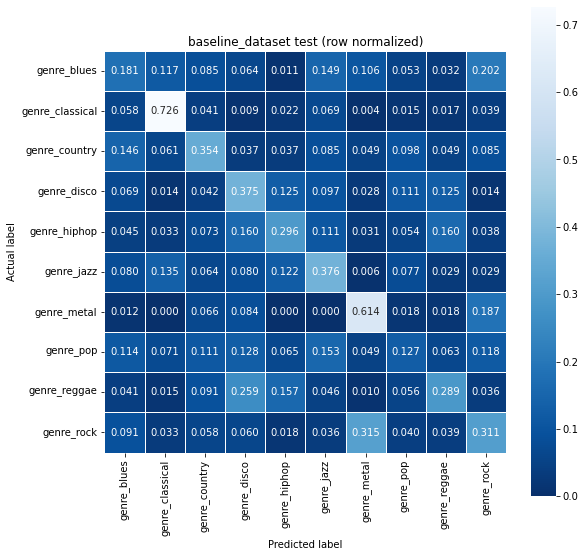

In [3]:
model_1 = logistic_regression_experiment(
    "../../../datasets/baseline_dataset.pickle", max_iteration=50
)

Train: train_accuracy = 0.511651

                 precision    recall  f1-score   support

    genre_blues     0.1190    0.3850    0.1818       374
genre_classical     0.8642    0.7761    0.8178      4221
  genre_country     0.1733    0.6514    0.2738       327
    genre_disco     0.1471    0.6540    0.2402       289
   genre_hiphop     0.5555    0.4562    0.5010      1701
     genre_jazz     0.4169    0.5415    0.4711      1241
    genre_metal     0.3518    0.7940    0.4875       665
      genre_pop     0.6375    0.2485    0.3576      4274
   genre_reggae     0.4269    0.6332    0.5100       788
     genre_rock     0.6216    0.4313    0.5092      3200

       accuracy                         0.5117     17080
      macro avg     0.4314    0.5571    0.4350     17080
   weighted avg     0.6169    0.5117    0.5269     17080

Test: test_accuracy = 0.496137

                 precision    recall  f1-score   support

    genre_blues     0.0877    0.2872    0.1343        94
genre_classical   

LogisticRegression(C=100.0, class_weight='balanced', max_iter=300,
                   multi_class='multinomial')

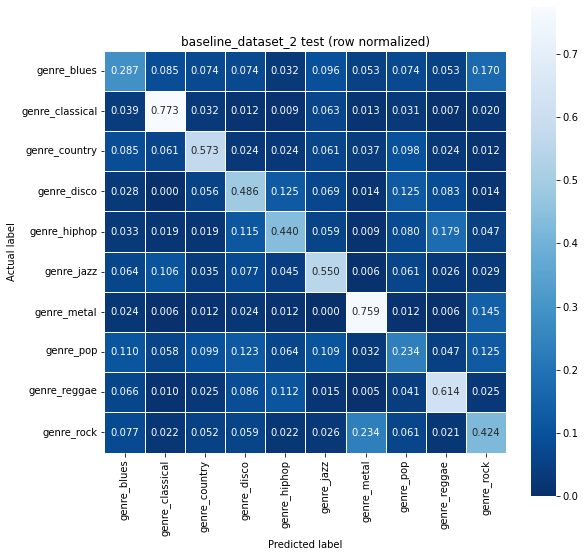

In [4]:
logistic_regression_experiment(
    "../../../datasets/baseline_dataset_2.pickle", max_iteration=300
)

Train: train_accuracy = 0.416920

                 precision    recall  f1-score   support

    genre_blues     0.0351    0.0374    0.0362       374
genre_classical     0.8679    0.7735    0.8180      4221
  genre_country     0.0746    0.2905    0.1187       327
    genre_disco     0.1070    0.4533    0.1732       289
   genre_hiphop     0.3564    0.2510    0.2946      1701
     genre_jazz     0.3065    0.4134    0.3520      1241
    genre_metal     0.2418    0.7805    0.3693       665
      genre_pop     0.5522    0.1584    0.2462      4274
   genre_reggae     0.2469    0.5520    0.3412       788
     genre_rock     0.4327    0.3266    0.3722      3200

       accuracy                         0.4169     17080
      macro avg     0.3221    0.4037    0.3121     17080
   weighted avg     0.5163    0.4169    0.4245     17080

Test: test_accuracy = 0.417232

                 precision    recall  f1-score   support

    genre_blues     0.0370    0.0319    0.0343        94
genre_classical   

LogisticRegression(C=100.0, class_weight='balanced', max_iter=650,
                   multi_class='multinomial')

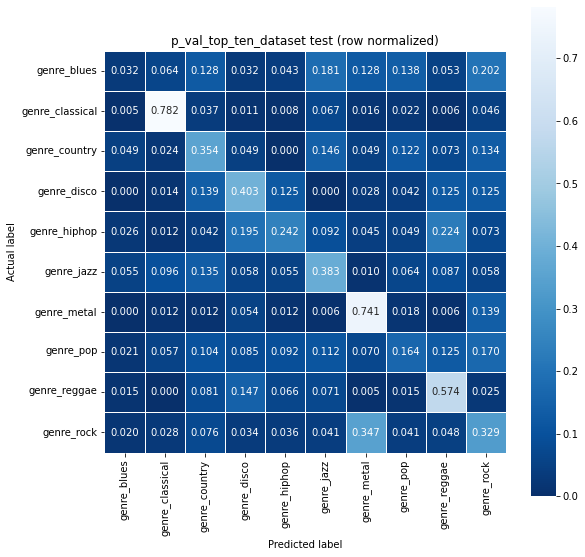

In [5]:
logistic_regression_experiment(
    "../../../datasets/p_val_top_ten_dataset.pickle", max_iteration=650
)